# Mid-Course Project

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!\
KP

## 0. Read in the Data

In [15]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv('../Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [16]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

How many movies are in this data set?

In [17]:
# number of moveies
movies.shape

(16638, 9)

Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [18]:
movies['in_theaters_date'] =  pd.to_datetime(movies['in_theaters_date'])

In [19]:
movies = movies[movies['in_theaters_date'].dt.year >= 2010]
movies.shape

(6053, 9)

Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [20]:
# highest rating by tomatometer_rating
movies.sort_values('tomatometer_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7318,High Ground,NR,"Documentary, Special Interest",2012-11-02,91.0,100,8,74.0,295.0
11941,Rodney King,NR,Drama,2017-04-28,52.0,100,9,NaN,NaN
1468,11:55,NR,Drama,2017-06-09,80.0,100,5,81.0,378.0
13051,Stations of the Elevated,NR,"Documentary, Musical & Performing Arts, Specia...",2014-10-17,45.0,100,8,33.0,124.0
2592,Among Wolves,NR,Documentary,2019-02-08,94.0,100,12,91.0,106.0


In [21]:
# highest rating by audience_rating
movies.sort_values('audience_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
14580,The Most Dangerous Year,NR,Documentary,2019-04-12,90.0,91,11,100.0,40.0
4239,Charm City,NR,Documentary,2018-10-19,108.0,100,16,100.0,24.0
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
4027,Calling All Earthlings,NR,Documentary,2018-06-29,74.0,58,12,100.0,34.0
7137,Haunt,R,"Horror, Mystery & Suspense",2019-09-13,92.0,68,38,100.0,7.0


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [22]:
movies_popular = movies[movies.audience_count > 10000]
movies_popular.shape

(1565, 9)

Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [23]:
movies_popular.sort_values("tomatometer_rating",ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
14351,The Invisible War,NR,"Documentary, Special Interest",2012-06-22,97.0,99,71,84.0,10107.0
6680,Gloria,R,"Art House & International, Drama",2014-01-24,108.0,99,128,64.0,10846.0
13030,Starred Up,NR,Drama,2014-08-27,106.0,99,112,84.0,16801.0
1860,20 Feet From Stardom,PG-13,"Documentary, Musical & Performing Arts",2013-06-14,89.0,99,125,82.0,13474.0
15930,Wadjda,PG,Drama,2013-09-13,100.0,99,118,88.0,13442.0


In [24]:
movies_popular.sort_values("audience_rating",ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
12920,Spider-Man: Far From Home,PG-13,"Action & Adventure, Science Fiction & Fantasy",2019-07-02,130.0,90,417,95.0,69196.0
12297,Senna,PG-13,"Documentary, Sports & Fitness",2011-08-12,104.0,92,119,95.0,17927.0
2362,Aladdin,PG,"Action & Adventure, Kids & Family, Science Fic...",2019-05-24,128.0,57,353,94.0,59029.0
15417,Toy Story 4,G,"Animation, Comedy, Kids & Family, Science Fict...",2019-06-21,90.0,97,404,94.0,53114.0
16582,Your Name. (Kimi No Na Wa.),PG,"Animation, Drama, Romance",2017-04-07,106.0,97,111,94.0,11716.0


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [25]:
movies_popular.rating.value_counts()

rating
R        701
PG-13    595
PG       203
NR        39
G         25
NC17       2
Name: count, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [26]:
movies_popular.groupby("rating")['audience_rating'].mean()

rating
G        72.960000
NC17     80.000000
NR       70.564103
PG       64.689655
PG-13    61.531092
R        59.459344
Name: audience_rating, dtype: float64

## 2. Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [31]:
import numpy as np
movies_popular['Animation'] = np.where(movies_popular.genre.str.contains('Animation', case=False),1,0)

In [30]:
# copy the movies to avoid a warning
movies_popular = movies[movies.audience_count > 100000].copy()

In [32]:
movies_popular['Action & Adventure'] =  np.where(movies_popular.genre.str.contains('Action & Adventure', case=False),1,0)

In [33]:
movies_popular['Comedy'] =  np.where(movies_popular.genre.str.contains('Comedy', case=False),1,0)

In [34]:
movies_popular.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,0,1,1
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0,0,1,0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0,0,0,0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0,0,1,0
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0,0,1,0


Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [35]:
movies_popular.groupby('rating')[['Animation','Action & Adventure','Comedy']].sum()

,Animation,Action & Adventure,Comedy
rating,,,
G,5,3,5
PG,26,27,29
PG-13,0,102,35
R,0,41,35


Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

In [37]:
# both critics and general audience love animated movies
movies_popular.groupby('Animation')[['tomatometer_rating','audience_rating']].mean()

,tomatometer_rating,audience_rating
Animation,,
0,58.340351,64.831579
1,75.258065,75.161290


In [38]:
# both critics and general audience love animated movies
movies_popular.groupby('Action & Adventure')[['tomatometer_rating','audience_rating']].mean()

,tomatometer_rating,audience_rating
Action & Adventure,,
0,59.111888,65.391608
1,60.734104,66.219653


In [40]:
# comedies have lower rating than other genre
movies_popular.groupby('Comedy')[['tomatometer_rating','audience_rating']].mean()

,tomatometer_rating,audience_rating
Comedy,,
0,62.169811,67.353774
1,55.576923,62.769231


## 3. Visualize the Data

Create a pair plot from the popular movies DataFrame.

In [41]:
import seaborn as sns

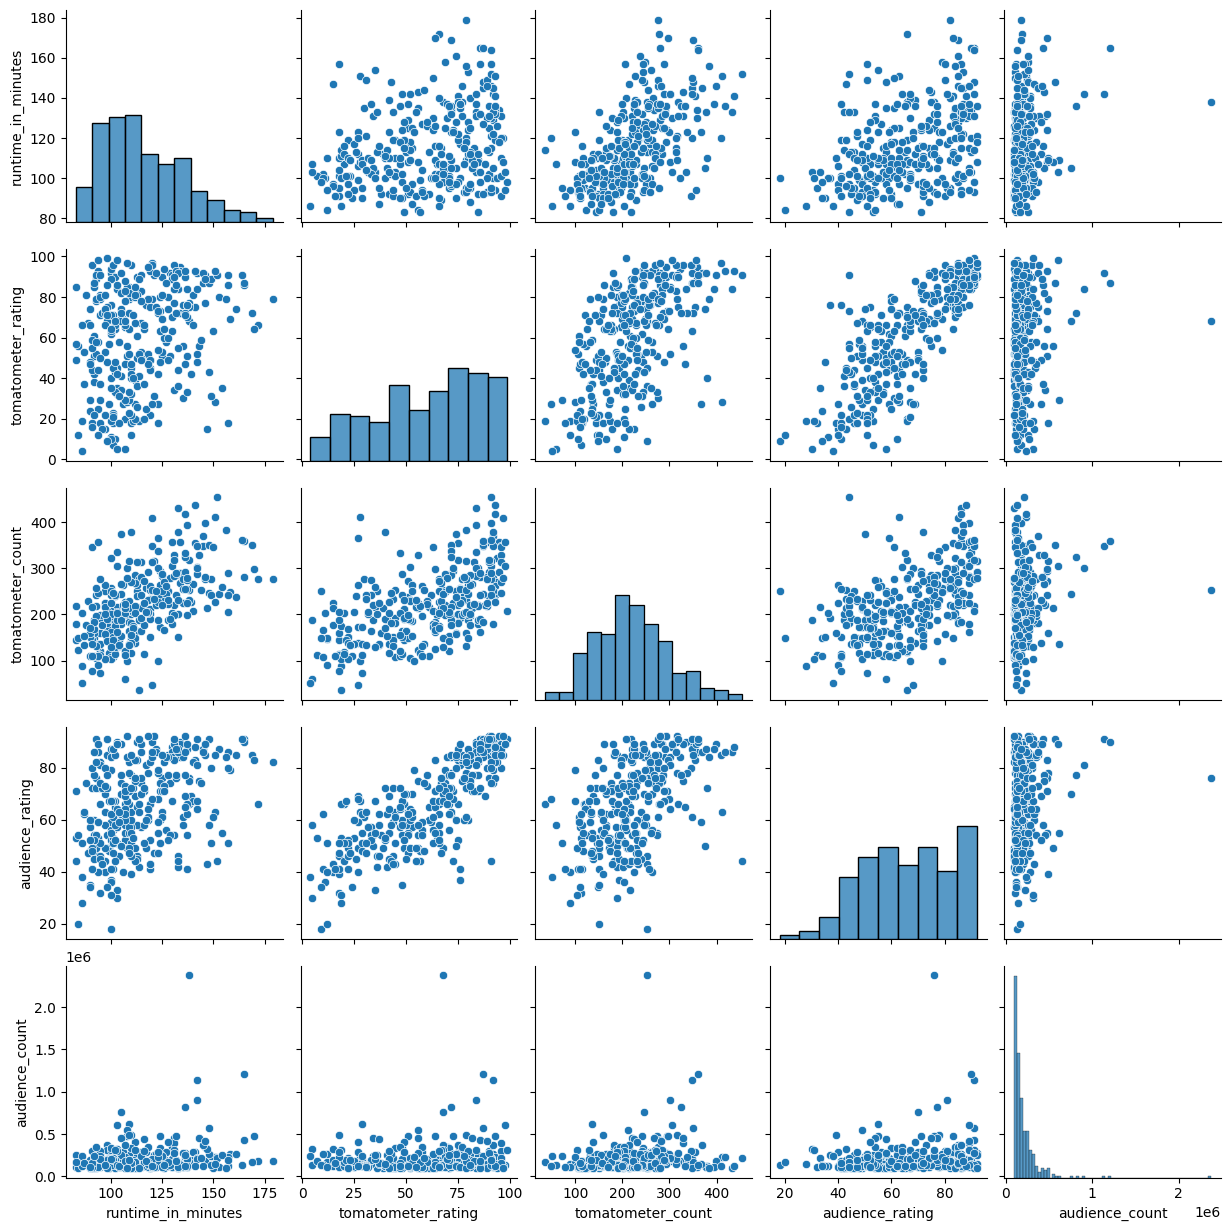

In [43]:
sns.pairplot(movies_popular.iloc[:,:-3])

What insights can you gather from this pair plot?
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?

In [46]:
movies_popular[movies_popular.audience_count > 1000000]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Animation,Action & Adventure,Comedy
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,0,1,0
9581,Marvel's The Avengers,PG-13,"Action & Adventure, Science Fiction & Fantasy",2012-05-04,142.0,92,348,91.0,1134955.0,0,1,0
13936,The Dark Knight Rises,PG-13,"Action & Adventure, Drama, Mystery & Suspense",2012-07-20,165.0,87,360,90.0,1210957.0,0,1,0
